# APPLIED DATA ANALYSIS ASSIGNMENT II ANSWERS

In [110]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


In [111]:
df = pd.read_csv("DefaultCSV.csv")

# QUESTION 5: 
__In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before beginning your analysis.__

__(a) Fit a logistic regression model that uses and to income balance predict default.__

In [112]:
columns = "balance income".split() # Defining our columns so we can use these features

In [113]:
data = df[['balance','income']] # Taking only the features that we are interested in

In [114]:
y = df.default # Defining our target value

In [115]:
def LogRegNoVal(data,columns,y): # I wrote a function which takes data, columns and our target. (No validation set approach)  
    datadf = pd.DataFrame(data, columns=columns) # I created my pandas dataframe
    
    X_train, X_test, y_train, y_test = train_test_split(datadf, y, test_size=0.2) # Spliting my data into train and test
    
    lr = linear_model.LogisticRegression() # Calling my logictic regression func. 
    
    lrmodel = lr.fit(X_train,y_train) # Building my model with my training set

In [116]:
LogRegNoVal(data,columns,y) 

C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:__

In [117]:
def LogRegYesVal(data,columns,y): 
    datadf = pd.DataFrame(data, columns=columns)
    
    # i. Split the sample set into a training set and a validation set.
    
    X_trainval, X_test, y_trainval, y_test = train_test_split(datadf, y, test_size=0.2) 
        # Spliting the X_trainval again into train and validation groups with 0.2 ratio 
    X_train, X_val,y_train,y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)
    
    # ii. Fit a multiple logistic regression model using only the training observations.
    lrV = linear_model.LogisticRegression() 
    lrVmodel = lrV.fit(X_train,y_train) 
    
    lrVprediction = lrVmodel.predict(X_val) 
    
    val_accuracy = accuracy_score(y_val,lrVprediction) 
    val_error = 1 - val_accuracy                      
    return "validation error: " + str(val_error) 

In [118]:
LogRegYesVal(data,columns,y)

C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'validation error: 0.040000000000000036'

__(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.__

In [119]:
for i in range(3):
    print (str(i+1)+". Model "+LogRegYesVal(data,columns,y))

1. Model validation error: 0.038124999999999964
2. Model validation error: 0.03249999999999997
3. Model validation error: 0.03249999999999997


C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.__

In [120]:
# I am going to add "student" feature to my model
columns2 = "student balance income".split()

In [121]:
data2 = df[['student','balance',"income"]]

In [122]:
LogRegYesVal(data2,columns2,y)

C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'validation error: 0.03249999999999997'

COMMENT : Student dummy variable did not change much for my validation error. ?? And this is weird. Probably I am doing a mistake with validation set aproach. My validation sets are just validation sets to see if my model is doing good or bad. However, it does not improve the model at all. I need to cross validation to improve the model.

# QUESTION 7: 
__In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will
now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set.
Recall that in the context of classification problems, the LOOCV error is given in (5.4).__

In [123]:
df_Weekly = pd.read_csv("WeeklyCSV.csv")

__(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.__

In [124]:
columns = "Lag1 Lag2".split()

In [125]:
data = df_Weekly[['Lag1','Lag2']]

In [133]:
y  = df_Weekly.Direction

In [134]:
datadf = pd.DataFrame(data, columns=columns)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(datadf, y, test_size=0.2)

In [136]:
lr = linear_model.LogisticRegression()

In [137]:
lrmodel = lr.fit(X_train,y_train)

C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__(b) Fit a logistic regressionmodel that predicts Direction using Lag1 and Lag2 using all but the first observation.__

In [161]:
datadfNoFirst = datadf[1:]

In [162]:
y2 = df_Weekly.Direction[1:]

In [163]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(datadfNoFirst, y2, test_size=0.2)

In [164]:
lr2 = linear_model.LogisticRegression()

In [165]:
lr2model = lr2.fit(X_train2,y_train2)

C:\Users\fatihbeyhan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__(c) Use the model from (b) to predict the direction of the first observation.You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?__

In [166]:
print (datadf[0:1])

    Lag1   Lag2
0  0.816  1.572


In [167]:
firstObs = datadf[0:1]

In [168]:
firstObsResult = df_Weekly.Direction[0:1]

In [171]:
print (firstObsResult)

0    Down
Name: Direction, dtype: object


In [169]:
lr2prediction = lr2.predict(firstObs)

In [170]:
print (lr2prediction)

['Up']


COMMENT: Prediction is not correct.

__(d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
ii. Compute the posterior probability of the market moving up for the ith observation.
iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.__

In [173]:
columns = "Lag1 Lag2".split()

In [175]:
data = df_Weekly[['Lag1','Lag2']]

In [176]:
y  = df_Weekly.Direction

In [188]:
datadf = pd.DataFrame(data, columns=columns)

In [201]:
print (datadf[0:1])

    Lag1   Lag2
0  0.816  1.572


In [215]:
lr3 = linear_model.LogisticRegression(solver='lbfgs')

In [227]:
counter = 0
for i in range(1,len(datadf)+1):
    if i != len(datadf):
        observationData = datadf[i:i+1]
        observationY = y[i:i+1]
        newData = datadf.drop(datadf.index[i:i+1])
        newY = y.drop(y.index[i:i+1])
        lr3model = lr3.fit(newData,newY)
        lr3predict = lr3model.predict(observationData)
        
        
        if str(observationY.values[0]) != str(lr3predict[0]):
            counter += 1
    else:
        pass
print (counter)
        

489


COMMENTS : So my models failed 489 times out of 1088 aproach.

In [228]:
489/1088

0.4494485294117647

COMMENTS: Our estimation of test error is 0.4494485

# QUESTION 8
__We will now perform cross-validation on a simulated data set.__

__(a) Generate a simulated data set as follows:__

    > set .seed (1)
    > x=rnorm (100)
    > y=x-2* x^2+ rnorm (100)

__In this data set, what is n and what is p? Write out the model used to generate the data in equation form.__

In [229]:
import numpy as np

In [230]:
np.random.seed(1)

In [231]:
x = np.random.rand(100)

In [233]:
y = x-2*x**2+np.random.rand(100)

COMMENTS : n is our sample size and it is 100. p is feature and it is x in this particullar case.

__(b) Create a scatterplot of X against Y . Comment on what you find.__

In [1]:
import matplotlib.pyplot as plt

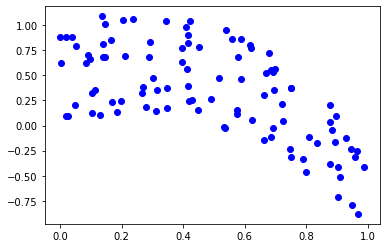

In [238]:
plt.plot(x, y, 'o', color='blue')

COMMENTS: The relation between them is obvious and it looks like second degree polynomial equation.

__(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:__
    - Y = β0 + β1X + e
    - Y = β0 + β1X + β2X2 + e
    - Y = β0 + β1X + β2X2 + β3X3 + e
    - Y = β0 + β1X + β2X2 + β3X3 + β4X4 + e
__Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .__

In [ ]:
I COULD NOT DO THIS ONE AND THE REST

__(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?__